In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
from torch import nn
from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

In [2]:
from text_recognizer.datasets import IamLinesDataset

In [3]:
dataset = IamLinesDataset(train=True)
dataset.load_or_generate_data()
print(dataset)

IAM Lines Dataset
Number classes: 80
Mapping: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'c', 39: 'd', 40: 'e', 41: 'f', 42: 'g', 43: 'h', 44: 'i', 45: 'j', 46: 'k', 47: 'l', 48: 'm', 49: 'n', 50: 'o', 51: 'p', 52: 'q', 53: 'r', 54: 's', 55: 't', 56: 'u', 57: 'v', 58: 'w', 59: 'x', 60: 'y', 61: 'z', 62: ' ', 63: '!', 64: '"', 65: '#', 66: '&', 67: "'", 68: '(', 69: ')', 70: '*', 71: '+', 72: ',', 73: '-', 74: '.', 75: '/', 76: ':', 77: ';', 78: '?', 79: '_'}
Data: (7101, 28, 952)
Targets: (7101, 97)



In [4]:
dataset.output_shape

(97, 80)

In [5]:
def convert_y_label_to_string(y, dataset=dataset):
    return ''.join([dataset.mapper(int(i)) for i in y]).rstrip("_")

convert_y_label_to_string(dataset.targets[0])

'A MOVE to stop Mr. Gaitskell from'

Griffiths resolution. Mr. Foot's line will
be that as Labour M Ps opposed the
Government Bill which brought life peers
into existence, they should not now put
forward nominees. He believes that the
House of Lords should be abolished and
that Labour should not take any steps
which would appear to "prop up" an out-
Since 1958, 13 Labour life Peers and
Peeresses have been created. Most Labour


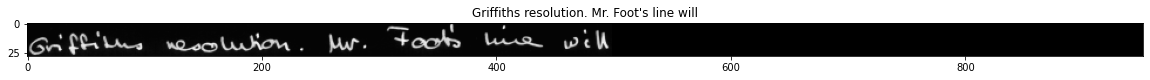

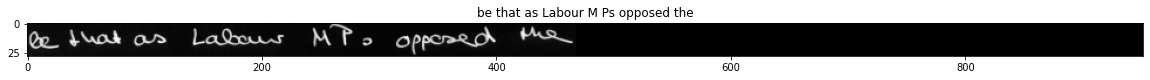

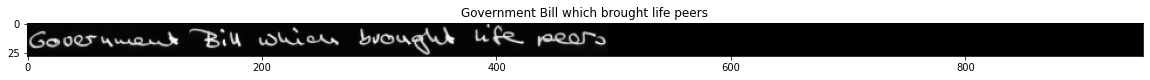

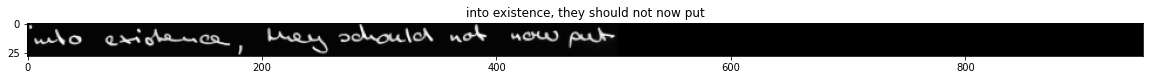

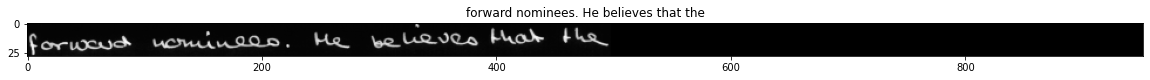

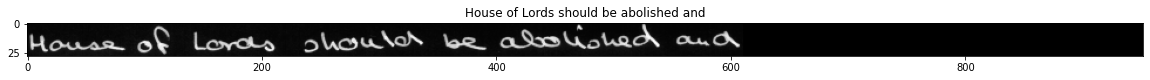

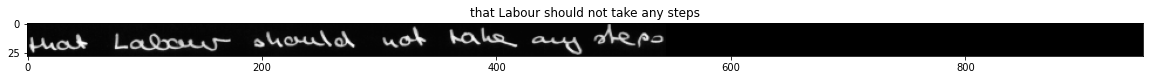

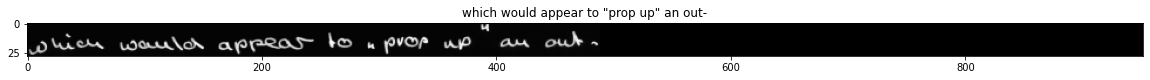

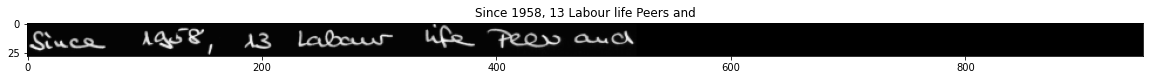

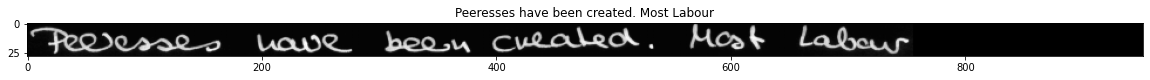

In [6]:
for i in range(10, 20):
    plt.figure(figsize=(20, 20))
    data, target = dataset[i]
    sentence = convert_y_label_to_string(target) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(data.squeeze(0).numpy(), cmap='gray')

In [46]:
data, target = dataset[0]
sentence = convert_y_label_to_string(target) 

In [47]:
h, w, s = 28, 18, 4

In [48]:
from einops.layers.torch import Rearrange
slide = nn.Sequential(nn.Unfold(kernel_size=(h, w), stride=(1, s)), Rearrange("b (c h w) t -> b t c h w", h=h, w=w, c=1))

In [49]:
patches = slide(data.unsqueeze(0))

A MOVE to stop Mr. Gaitskell from


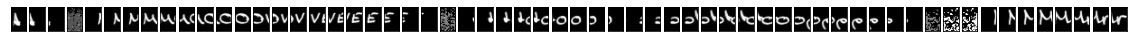

In [50]:
# remove batch size
n = 60
patches = patches.squeeze(0)
fig = plt.figure(figsize=(20, 20))
print(sentence)
for i in range(n):
    ax = fig.add_subplot(1, n, i + 1)
    ax.imshow(patches[i].squeeze(0), cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

In [44]:
patches.shape

torch.Size([234, 1, 28, 18])

In [13]:
32 * 0.75

24.0